In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("matches.csv")

In [29]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Which stadium is best for winning  by runs?

In [4]:
data.venue[data.win_by_runs!=0].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [5]:
data[data['win_by_runs']!=0]['venue'].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

# Which stadium is best for winning by wicket?

In [6]:
data.venue[data.win_by_wickets!=0].mode()

0             Eden Gardens
1    M Chinnaswamy Stadium
dtype: object

# for a IPL team of your choice which stadium is best when they win the toss?

In [30]:
data.venue[data.toss_winner=='Mumbai Indians'] [data.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

In [32]:
data.venue[data['toss_winner']=='Mumbai Indians'][data['winner']=='Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

# Which is the best chasing team?

In [37]:
data.winner[data.win_by_wickets!=0].mode()

0    Kolkata Knight Riders
dtype: object

#  People after choosing to field who won more matches?

In [38]:
data.winner[data.toss_decision=='field'].mode()

0    Mumbai Indians
dtype: object

# Which is the best defending team?


In [40]:
data.winner[data.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

# Has toss-winning helped in match-winning?Plot a graph

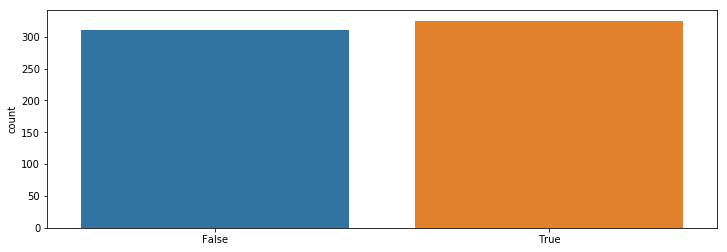

In [41]:
to=data['toss_winner']==data['winner']
plt.figure(figsize=(12,4))
sns.countplot(to)

# Toss winning team wins the match. plot a graph

In [42]:
to=data[data['toss_winner']==data['winner']]['winner']

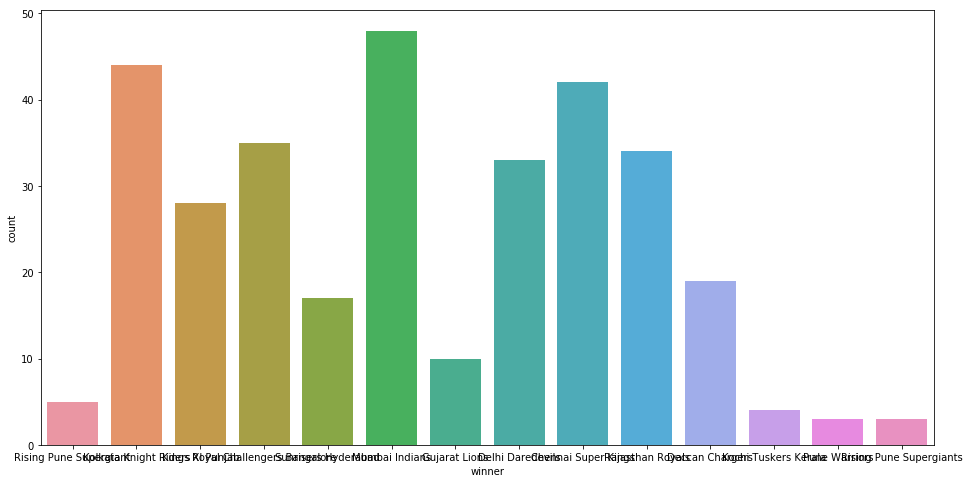

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(to)

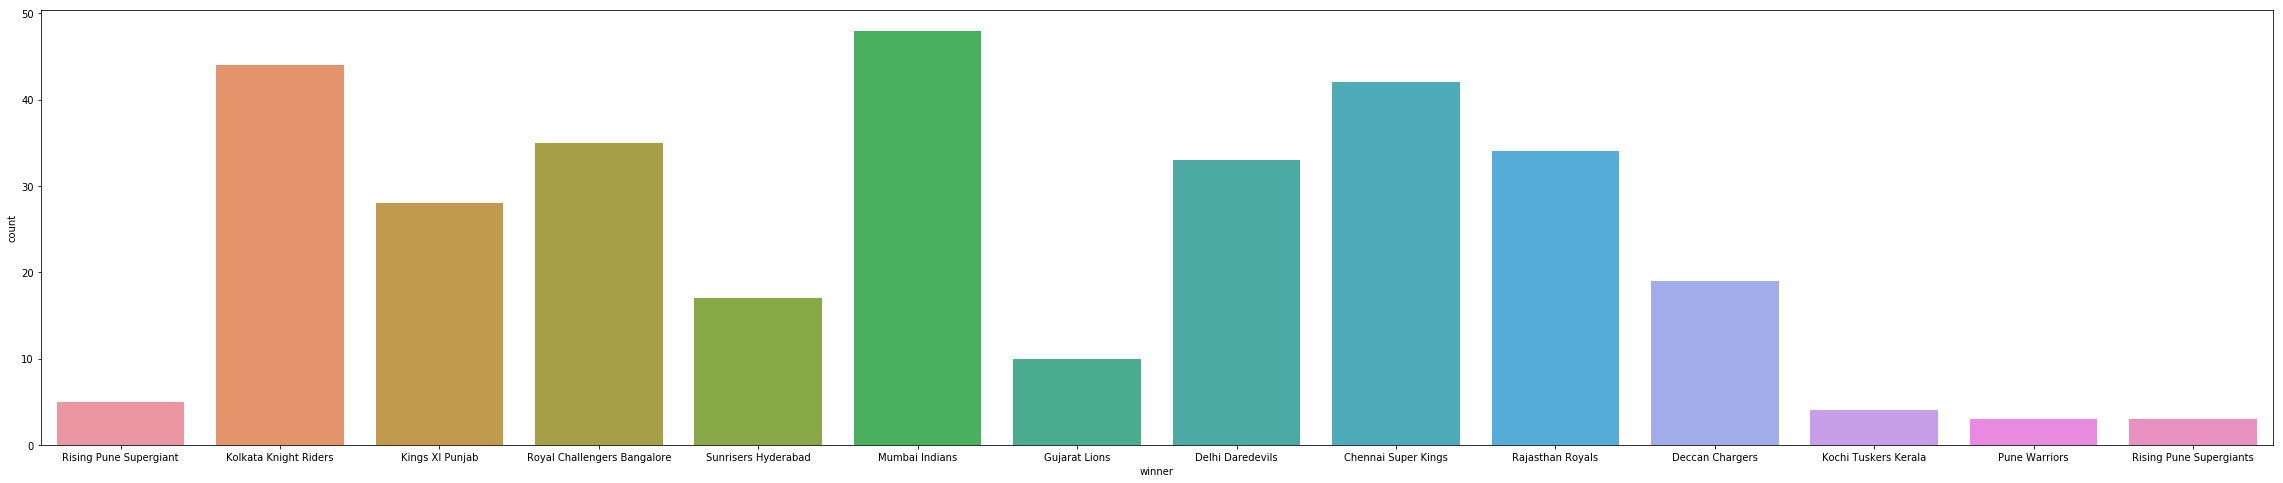

In [47]:
to=data.winner[data.toss_winner==data.winner]
plt.figure(figsize=(40,8))
sns.countplot(to)

# Does choosing batting or bowling first helped in match winning?

In [48]:
data.winner[data.toss_decision=='field'].mode()

0    Mumbai Indians
dtype: object

In [49]:
data.winner[data.toss_decision=='bat'].mode()

0    Chennai Super Kings
dtype: object

In [50]:
to=data.toss_decision[data.toss_winner==data.winner]

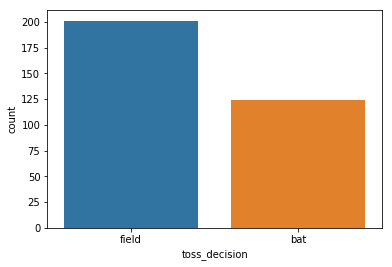

In [51]:
sns.countplot(to)

In [55]:
countw=0
countr=0
for i in data:
    if data['win_by_wickets']!=0:
        countw+=1
    elif data['win_by_runs']!=0:
        countr+=1
    else:
        continue
print(countw,countr)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Which team has got result tie?


In [66]:
tf=data[data.result=='tie']

In [67]:
tf[['team1','team2']]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab


In [72]:
data[data['result']=='tie'][['team1','team2']]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab


# In which city does weather affect the matches?

In [73]:
data.city[data.dl_applied!=0].mode()

0    Bangalore
1      Kolkata
dtype: object

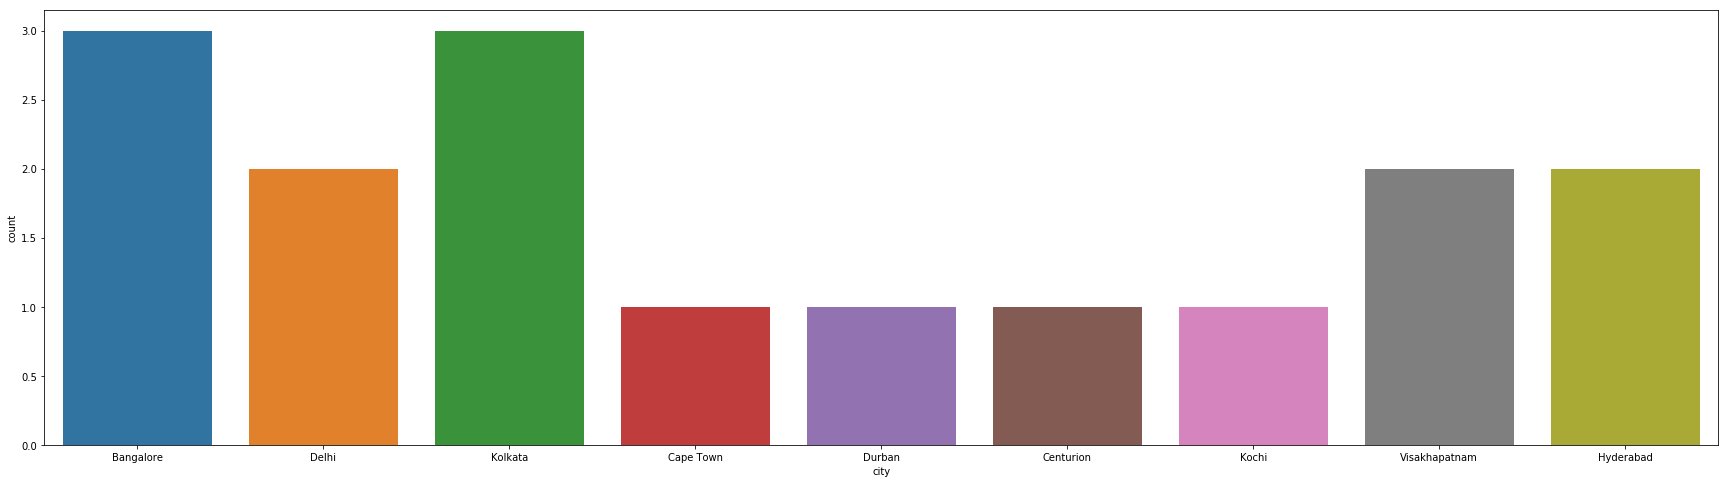

In [78]:
plt.figure(figsize=(30,8))
sns.countplot(data.city[data.dl_applied!=0])


# Which season had most no of matches?

In [79]:
data['season'].mode()

0    2013
dtype: int64

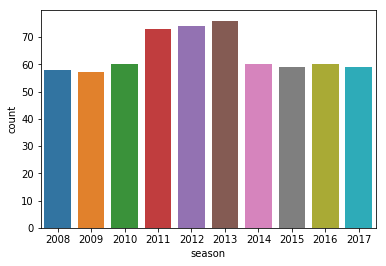

In [80]:
sns.countplot(data.season)

# Best chasing venues

In [83]:
x=data.venue[data.win_by_wickets!=0].mode()

In [84]:
x

0             Eden Gardens
1    M Chinnaswamy Stadium
dtype: object

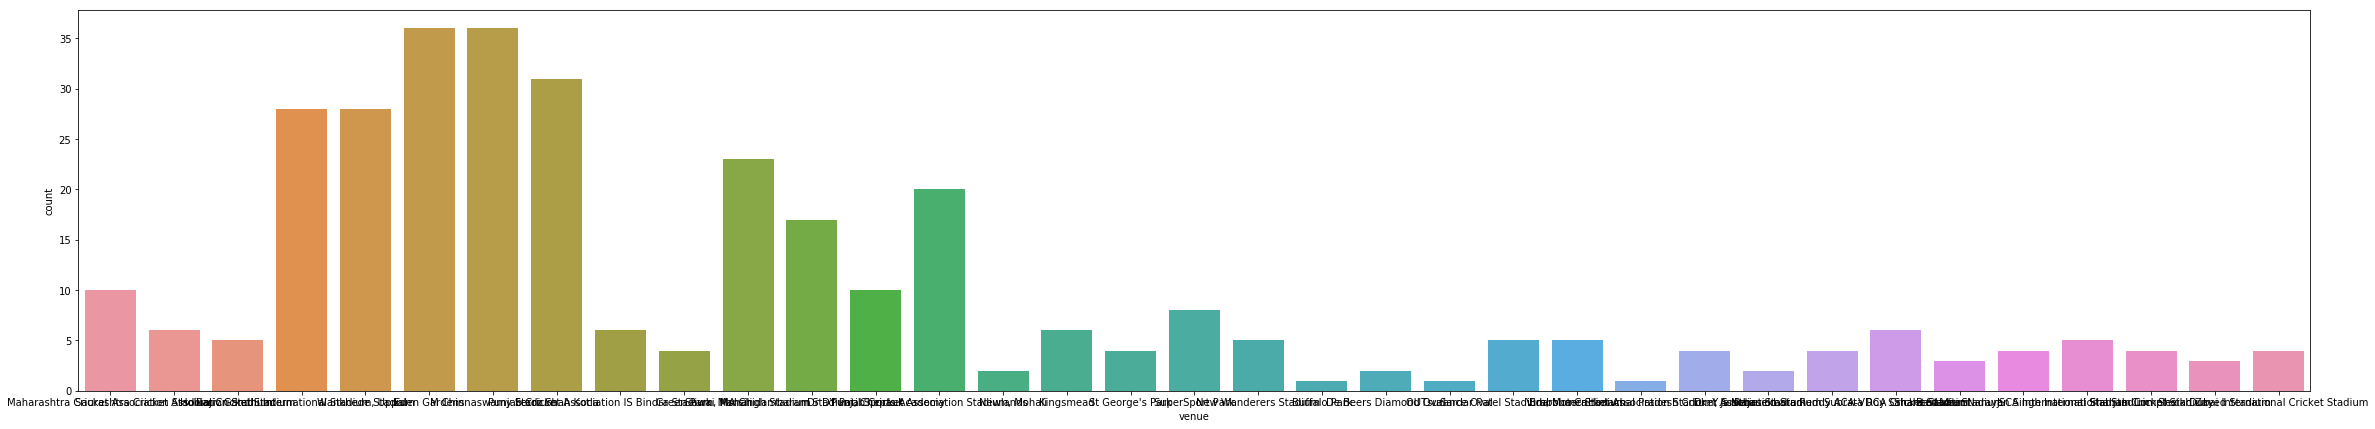

In [88]:
plt.figure(figsize=(40,7))
sns.countplot(data.venue[data.win_by_wickets!=0])


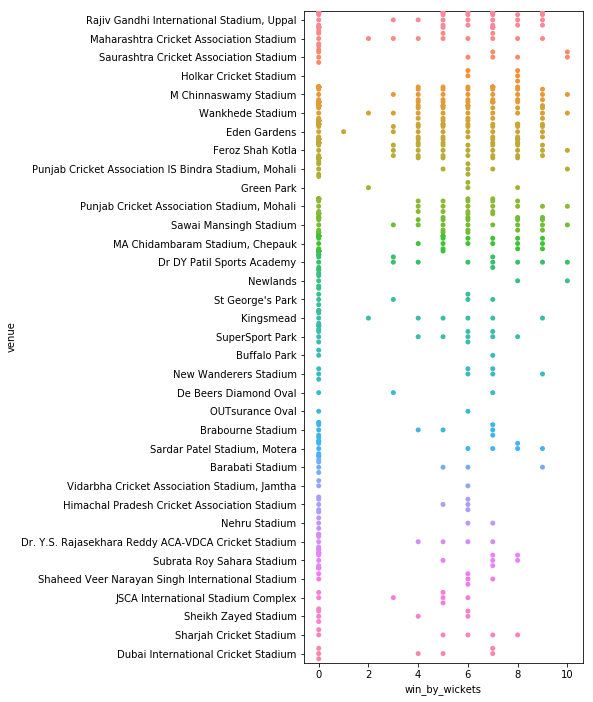

In [90]:
plt.figure(figsize=(5,12))
sns.swarmplot(x='win_by_wickets',y='venue',data=data)


# Best defending venue

In [92]:
data.venue[data.win_by_runs!=0].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

# Most successful ipl team?

In [93]:
data.winner.mode()

0    Mumbai Indians
dtype: object

# Team won by max run and best defending team?

In [106]:
data.winner[np.max(data.win_by_runs)]

'Deccan Chargers'

In [110]:
data.winner[data.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

In [123]:
data.win_by_runs.max()

146

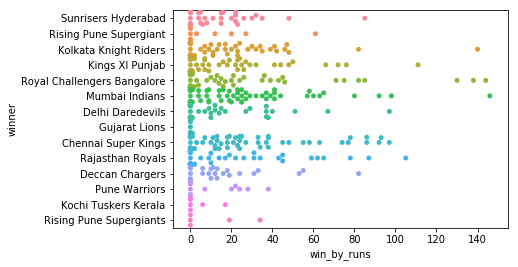

In [7]:
sns.swarmplot(x='win_by_runs',y='winner',data=data)

# Predict who is going to win ipl 2017?

In [124]:
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               636 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             636 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [6]:
data['city'].fillna('Dubai',inplace=True)

In [7]:
data['winner'].fillna('Draw',inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               636 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             636 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [10]:
data.drop(['city','date','umpire1','umpire2','umpire3','venue','player_of_match','result'],axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 10 columns):
id                636 non-null int64
season            636 non-null int64
team1             636 non-null object
team2             636 non-null object
toss_winner       636 non-null object
toss_decision     636 non-null object
dl_applied        636 non-null int64
winner            636 non-null object
win_by_runs       636 non-null int64
win_by_wickets    636 non-null int64
dtypes: int64(5), object(5)
memory usage: 49.8+ KB


In [12]:
data.head()

,id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,0,Kolkata Knight Riders,0,10
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,0,Kings XI Punjab,0,6
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,15,0


In [13]:
toss_dec=pd.get_dummies(data['toss_decision'],drop_first=True)

In [14]:
data=pd.concat([data,toss_dec],axis=1)

In [15]:
data.drop('toss_decision',axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 10 columns):
id                636 non-null int64
season            636 non-null int64
team1             636 non-null object
team2             636 non-null object
toss_winner       636 non-null object
dl_applied        636 non-null int64
winner            636 non-null object
win_by_runs       636 non-null int64
win_by_wickets    636 non-null int64
field             636 non-null uint8
dtypes: int64(5), object(4), uint8(1)
memory usage: 45.4+ KB


In [17]:
data.head()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,field
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,0,Sunrisers Hyderabad,35,0,1
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,0,Rising Pune Supergiant,0,7,1
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,Kolkata Knight Riders,0,10,1
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,0,Kings XI Punjab,0,6,1
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,0,Royal Challengers Bangalore,15,0,0


In [18]:
data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


In [19]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}

In [20]:
data.replace(encode, inplace=True)

In [21]:
data.head()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,field
0,1,2017,10,3,3,0,10,35,0,1
1,2,2017,1,11,11,0,11,0,7,1
2,3,2017,8,2,2,0,2,0,10,1
3,4,2017,11,9,9,0,9,0,6,1
4,5,2017,3,7,3,0,3,15,0,0


In [22]:
data.columns

Index(['id', 'season', 'team1', 'team2', 'toss_winner', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'field'],
      dtype='object')

In [98]:
X=data[[ 'team1', 'team2', 'toss_winner','dl_applied',
        'field']]
y=data['winner']

In [99]:
X = preprocessing.scale(X)

C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lm=LinearRegression()

In [103]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
pred=lm.predict(X_test)

In [105]:
from sklearn import metrics

In [106]:
metrics.mean_absolute_error(y_test,pred)

2.0819831682249044

In [108]:
data

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,field
0,1,2017,10,3,3,0,10,35,0,1
1,2,2017,1,11,11,0,11,0,7,1
2,3,2017,8,2,2,0,2,0,10,1
3,4,2017,11,9,9,0,9,0,6,1
4,5,2017,3,7,3,0,3,15,0,0
5,6,2017,8,10,10,0,10,0,9,1
6,7,2017,2,1,1,0,1,0,4,1
7,8,2017,3,9,3,0,9,0,8,0
8,9,2017,7,11,11,0,7,97,0,1
9,10,2017,10,1,1,0,1,0,4,1


In [109]:
def getMatchesForTeamAgainstTeam(team_id,against_id):
    return data[((data["team1"] == team_id) & (data["team2"] == against_id)) | ((data["team1"] == against_id) & (data["team2"] == team_id))]


In [110]:
def getMatchWonByTeamAgainstTeam(team_id,against_id):
    totalMatchesDF = getMatchesForTeamAgainstTeam(team_id,against_id)
    return totalMatchesDF[totalMatchesDF["winner"] == team_id]


In [111]:
def getMatchWonPercentageForTeamAgainstTeam(team_id,against_id):
    result = 0
    totalMatchesDF = getMatchesForTeamAgainstTeam(team_id,against_id)
    matchesWon = len(totalMatchesDF[totalMatchesDF["winner"] == team_id])
    totalMatches = len(totalMatchesDF)
    if(totalMatches>0):
        result = (matchesWon*100)/totalMatches
    return result

In [112]:
def geneareWinPercentageSheet():
    print("Generating WinPercent Data")
    df = pd.DataFrame( columns=('team_id','opponent_id','win_percentage'))
    pos = 0
    for index, row in data.iterrows():
        teamId = row["id"]
        for i, r in data.iterrows():
            ti = r["id"]
            if(ti != teamId):
                win_percent = np.nan
                matchesAgainst = len(getMatchesForTeamAgainstTeam(teamId,ti))
                matchesWonAgainst = len(getMatchWonByTeamAgainstTeam(teamId,ti))
                if(matchesAgainst > 0):
                    win_percent = (matchesWonAgainst*100)/matchesAgainst
                df.loc[pos,"team_id"] = teamId
                df.loc[pos,"opponent_id"] = ti
                df.loc[pos,"win_percentage"] = win_percent
                pos = pos + 1
    data.to_csv("../data/gen/win_percent.csv",sep=',')
    print("Done")

In [119]:
def generatePredictData(teamId,opponentId,tossWon,batFirst):
    df = pd.DataFrame(columns=('Team_Id','opp_teamid','Toss_Won','Bat_First',
                                 'Win_Percenetage_Against'))
    pos = 0
    teamTossWon = 0
    teamBatFirst=0
    teamMatchWinPercentAgainstOpponent = getMatchWonPercentageForTeamAgainstTeam(teamId,opponentId)

    
    df.loc[pos,"Team_Id"] = teamId
    df.loc[pos,"opp_teamid"]=opponentId
    df.loc[pos,"Toss_Won"] = tossWon
    df.loc[pos,"Bat_First"] = batFirst
    
    df.loc[pos,"Win_Percenetage_Against"] = teamMatchWinPercentAgainstOpponent

    return df


In [131]:
def predict():
    print("Enter Team A Id")
    teamId = input()
    while(len(data[data["team1"] == int(teamId)]) == 0):
        print("Please Enter valid Team Id")
        teamId = input()
    print("Enter Team B Id")
    opponentId = input()
    while(len(data[data["team2"] == int(opponentId)]) == 0):
        print("Please Enter valid Team Id")
        opponentId = input()
    print("Which team won the toss?Enter Id")
    tossWon = input()
    while((tossWon != teamId) & (tossWon != opponentId)):
        print("Please Enter valid Team Id. %s or %s" % (teamId,opponentId))
        tossWon = input()
    print("Which team bat first?Enter Id")
    batFirst = input()
    while((batFirst != teamId) & (batFirst != opponentId)):
        print("Please Enter valid Team Id. %s or %s" % (teamId,opponentId))
        batFirst = input()
    px = generatePredictData(int(teamId),int(opponentId),int(tossWon),int(batFirst))
    print(px)
    print('--'*40)


    
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    pred=rf.predict(px)
    print('--'*80)
    print(pred[0])
    if (pred[0] == 1):
        print("Team A Wins")
    else:
        print("Team B Wins")
    

In [132]:
predict()

Enter Team A Id
1
Enter Team B Id
3
Which team won the toss?Enter Id
1
Which team bat first?Enter Id
1
  Team_Id opp_teamid Toss_Won Bat_First Win_Percenetage_Against
0       1          3        1         1                 61.9048
--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------
10
Team B Wins


C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
